In [2]:
# 최초 

# Tensorflow Object Detection API
- Tensorflow Object Detection API는 TensorFlow를 이용해서 Object Detection 모델을 train하고 deploy하는 것을 쉽게 도와주는 오픈소스 프레임워크.
- https://github.com/tensorflow/models/tree/master/research/object_detection
- Tutorial: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/

# Custom (Image) Data 구하기

# Custom (Image) Data Labeling

# 전단계
- 구글드라이브 연결
- 상대경로로 할 것이므로 Process.ipynb 있는 디렉토리로 이동
- workspace/images 에 이미지 데이터셋 넣고 압축 푼다. 

In [1]:
import sys
sys.path

['C:\\Users\\mein0\\1.JupyterNoteCodes\\10.Object_Detection\\object_detection_workspace',
 'C:\\Users\\mein0\\1_playdataInstalls\\TF_oda2\\models\\research',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\python37.zip',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\DLLs',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2',
 '',
 'C:\\Users\\mein0\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib\\site-packages',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib\\site-packages\\win32',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\mein0\\anaconda3\\envs\\tf2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\mein0\\.ipython']

In [1]:
import tensorflow as tf

# Tensorflow Object Detection 2 API 설치
1. clone 
    - `!git clone https://github.com/tensorflow/models.git`
1. PYTHONPATH 환경설정에 models/research 추가  
1. 필요 모듈 설치
    - `!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk`
    - `!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools`
1. proto 파일 컴파일
    - models/research 경로로 이동
        - `%cd models/research`
    - `!protoc object_detection/protos/*.proto --python_out=.`
1. setup.py 를 이용해 필요한 모듈 추가 설치
    - setup.py를 현재 디렉토리로 카피
        - `!cp object_detection/packages/tf2/setup.py . `
    - 설치
        - `!python -m pip install . `
    - 설치 확인 - 아래 스크립트 실행시 오류 없이 실행되면 설치 잘 된 것임.
        - `!python object_detection/builders/model_builder_tf2_test.py`
1. 원래 디렉토리로 이동
    - `%cd ../..`        

In [2]:
# 2. PYTHONPATH 환경설정. models/research 경로.
import os
# os.environ['PYTHONPATH'] +=':/content/drive/My Drive/object_detection/object_detection_workspace/models/research'

# WINDOWS
# os.environ['PYTHONPATH'] += ";C:/Users/mein0/1_playdataInstalls/TF_oda2/models/research"#시작 세미콜론
# os.environ['PYTHONPATH'] += ";C:/Users/mein0/1_playdataInstalls/TF_oda2/models/research/object_detection"

In [52]:
os.environ?

# 경로 설정

In [ ]:
# mypath = '../../../1. Data/datasets/finger_images'

In [1]:
import os

In [6]:
BASE_PATH = r'..\..\..\1.Data\object_detection_workspace\workspace' #  작업시 생기는 파일들을 저장할 root디렉토리.
SCRIPT_PATH = r'..\..\..\1.Data\object_detection_workspace\scripts' # utility python script들이 저장된 디렉토리.
TF_OD_API_PATH = r'..\..\..\1_playdataInstalls\TF_oda2\models' # Tensorflow object detection api 설치 경로.

IMAGE_PATH = os.path.join(BASE_PATH, 'images') # image data들, annotation 파일이 저장된 디렉토리.

LABEL_MAP_PATH = os.path.join(BASE_PATH, 'labelmap') # Label map파일이 저장된 디렉토리.
LABEL_MAP_FILE_PATH = os.path.join(LABEL_MAP_PATH, 'label_map.pbtxt') # Label_map파일 경로

TF_RECORD_PATH = os.path.join(BASE_PATH, 'tfrecord') # TFRecord파일들을 저장할 경로.

MODEL_PATH = os.path.join(BASE_PATH, 'model') # pretrained 모델 fine tuning한 모델, weight(ckpt), pipeline.config를 저장할 경로.
CHECK_POINT_PATH = os.path.join(MODEL_PATH, 'checkpoint') # 학습도중에 중간 중간 저장되는 weight
EXPORT_MODEL_PATH = os.path.join(MODEL_PATH, 'export_model') # fine tuning한 최종 모델을 저장할 경로
PIPELINE_CONFIG_PATH = os.path.join(MODEL_PATH, 'pipeline.config') # pipeline.config(설정파일)의 경로.

PRE_TRAINED_MODEL_PATH = os.path.join(BASE_PATH, 'pre_trained_model') # 전이학습 시킬 model을 저장할 경로.

# Custom data 학습 시키기

## 다음 세가지 작업이 필요
<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```

<span style='font-weight:bold;font-size:1.3em'>2. pipeline.config</span>
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- `models\research\object_detection\samples\configs`

<span style='font-weight:bold;font-size:1.3em'>3. 학습/검증/테스트에 사용할 데이터셋을 TFRecord 로 구성</span>
- 주요 데이터셋을 TFRecord로 생성하는 코드
- `models\research\object_detection\dataset_tools`

# 데이터셋 준비
- images에 있는 데이터들을 train/test 용으로 분리

In [3]:
# 디렉토리 만들기.
train_dir = os.path.join(IMAGE_PATH, 'train') # train data 저장경로
test_dir = os.path.join(IMAGE_PATH, 'test') # test data 저장경로

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
# 카피
file_list = os.listdir(IMAGE_PATH)
# len(file_list)
# file_list[:10]
image_list = [fname for fname in file_list if os.path.splitext(fname)[-1]=='.jpg']
len(image_list)

54

In [6]:
# shutil.copy(원본경로, 복사할 경로)
import shutil
count=0
current_label = None
train_len = 8

for img_name in image_list:
    label = img_name.split('-')[0]
    ann_name = os.path.splitext(img_name)[0]+'.xml' # annotation 파일이름 조회
    # print(ann_name)
    if current_label != label: # 새로운 라벨에 대한 카피 시작
        count = 0
        current_label = label
    # 복사작업
    img_path = os.path.join(IMAGE_PATH, img_name)
    ann_path = os.path.join(IMAGE_PATH, ann_name)

    train_path = os.path.join(IMAGE_PATH, 'train') # 카피 대상 디렉토리
    test_path = os.path.join(IMAGE_PATH, 'test')

    # count가 train_len 보다 작으면 train 폴더에 카피, 이상이면 test폴더에 카피
    if count < train_len:
        shutil.copy(img_path, train_path) # 이미지 카피
        shutil.copy(ann_path, train_path) # annotation 파일 카피
    else:
        shutil.copy(img_path, test_path)
        shutil.copy(ann_path, test_path)
    count += 1

In [5]:
len(os.listdir('../../../1.Data/object_detection_workspace/workspace/images/train'))

80

In [6]:
len(os.listdir('../../../1.Data/object_detection_workspace/workspace/images/test'))

28

# Label Map 생성
- text 에디터에서 직접 작성
- File IO를 이용해 코드상에서 파일 작성

In [11]:
labels = [
    {'name':'one','id':1},
    {'name':'two','id':2},
    {'name':'three','id':3},
    {'name':'four','id':4},
    {'name':'five','id':5},
    ]
with open(LABEL_MAP_FILE_PATH, 'wt') as fw:
    for label in labels:
        # print(label)
        fw.write('item {\n')
        fw.write("\tname:'{}'\n".format(label['name']))
        fw.write('\tid:{}\n'.format(label['id']))
        fw.write('}\n')


# TFRecord 생성
- scripts/generate_tfrecord.py
    - command line argument
        - -x, --xml_dir: annotation 파일이 있는 디렉토리
        - -l, --labels_path: Label map의 경로(파일명포함)
        - -o, --output_path: 생성된 tfrecord파일을 저장할 디렉토리
        - -i, --img_dir: image 데이터가 있는 디렉토리 경로(annotation동일한 위치에 있으면 생략가능 -x)

In [12]:
# !python scripts/generate_tfrecord.py

In [47]:
# train set
#f'!python ./{SCRIPT_PATH}/generate_tfrecord.py -x {os.path.join(IMAGE_PATH,"train")}'


f'!python ./{SCRIPT_PATH}/generate_tfrecord.py -x {os.path.join(IMAGE_PATH,"train")} -l {LABEL_MAP_FILE_PATH} -o {os.path.join(TF_RECORD_PATH, "train.tfr")}'

'!python ./../../../1.Data/object_detection_workspace/scripts/generate_tfrecord.py -x ../../../1.Data/object_detection_workspace/workspace\\images\\train -l ../../../1.Data/object_detection_workspace/workspace\\labelmap\\label_map.pbtxt -o ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\train.tfr'

In [7]:
!python ./../../../1.Data/object_detection_workspace/scripts/generate_tfrecord.py -x ../../../1.Data/object_detection_workspace/workspace\\images\\train -l ../../../1.Data/object_detection_workspace/workspace\\labelmap\\label_map.pbtxt -o ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\train.tfr

Successfully created the TFRecord file: ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\train.tfr


In [67]:
f'!python ./{SCRIPT_PATH}/generate_tfrecord.py -x {os.path.join(IMAGE_PATH,"test")} -l {LABEL_MAP_FILE_PATH} -o {os.path.join(TF_RECORD_PATH, "test.tfr")}'

'!python ./../../../1.Data/object_detection_workspace/scripts/generate_tfrecord.py -x ../../../1.Data/object_detection_workspace/workspace\\images\\test -l ../../../1.Data/object_detection_workspace/workspace\\labelmap\\label_map.pbtxt -o ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\test.tfr'

In [8]:
!python ./../../../1.Data/object_detection_workspace/scripts/generate_tfrecord.py -x ../../../1.Data/object_detection_workspace/workspace\\images\\test -l ../../../1.Data/object_detection_workspace/workspace\\labelmap\\label_map.pbtxt -o ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\test.tfr

Successfully created the TFRecord file: ../../../1.Data/object_detection_workspace/workspace\\tfrecord\\test.tfr


# Pretrained Model Download
- Tensorflow object detection API는 MS COCO 2017 dataset으로 미리 학습시킨 다양한 Object Detection 모델을 제공한다.
- tf2 detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- SSD MobileNet V2 FPNLite 320x320 다운로드
    - 성능은 떨어지지만 학습속도가 빠르다.

In [ ]:
# colab download
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

In [70]:
import tarfile
with tarfile.open('ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz') as tf:
    tf.extractall('../../../1.Data/object_detection_workspace/workspace/pre_trained_model')

# Pipeline.config 설정 변경

## pipeline.config  파일 개요
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- 구조
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md
    - **model**
        - 사용하는 모델에 대한 설정
        - class 개수
        - 입력이미지 size
        - anchor 설정
    - **train_config**
        - Train(학습)관련 설정
        - batch_size
            - 사용하는 GPU의 메모리 크기에 맞게 조절한다.
        - image augmentation관련 설정 등
        - optimizer관련 설정
        - 학습에 사용할 weight 파일의 경로
    - **train_input_reader**
        - labelmap 파일 경로
        - train tfrecord 파일 경로
    - **eval_config**
        - evaluation(평가)을 위해 사용하는 metric 설정
    - **eval_input_reader**
        - labelmap 파일 경로
        - evaluation tfreord 파일 경로
        

## Pretrain model의 pipeline.config 파일 카피
- pretrained 모델의 압축을 풀면 pipeline.config 파일이 있다.
- workspace\model 로 copy 한다.

In [72]:
pipeline_originpath = os.path.join(PRE_TRAINED_MODEL_PATH,'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8','pipeline.config')


In [73]:
shutil.copy(pipeline_originpath, PIPELINE_CONFIG_PATH)

'../../../1.Data/object_detection_workspace/workspace\\model\\pipeline.config'

## pipeline.config 설정 변경
- pipeline.config 내용 변경은 파일을 **직접 변경**할 수도 있고 **코드상에서 변경**할 수도 있다.

### 필수 변경사항
-  class개수 변경
-  train 배치 사이즈 변경 - gpu 메모리 사양에 맞게 변경한다.
-  pretrained model 경로 설정
-  pretrained model이 어떤 종류의 모델인지 설정
-  train 관련 변경
    -  labelmap 파일 경로 설정
    -  train 용 tfrecord 파일 경로 지정
-  evaluation 관련 변경
    -  labelmap 파일 경로 설정
    -  evaluation 용 tfrecord 파일 경로 지정

In [3]:
import os
os.getcwd()


'C:\\Users\\mein0\\1.JupyterNoteCodes\\10.Object_Detection\\object_detection_workspace'

In [ ]:
# os.chdir('C:\\Users\\mein0\\1_playdataInstalls\\TF_oda2\\models\\research')

In [4]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [10]:
# pipeline.config 파일을 조회 출력
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)# pipeline.config 파일 경로를 주면 딕셔너리 읽어온다.
print(type(config))
config

<class 'dict'>


{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [11]:
# 특정 설정들을 변경(수정)
# pipeline config 템플릿 (설정값이 없는 빈 템플릿) 생성
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
pipeline_config

In [13]:
# 기존 pipeline.config의 설정을 읽어서 template에 덮어쓴다.
with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'r') as fr:
    proto_str = fr.read()
    text_format.Merge(proto_str, pipeline_config) # 읽어온 str이 pipeline_config에 추가
    

In [14]:
# 항목별 수정
# class 개수 변경

pipeline_config.model.ssd.num_classes = 5

# batch_size변경
pipeline_config.train_config.batch_size = 16

# pretrained model의 넣어줄 weight(가중치)파일 경로 설정.
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRE_TRAINED_MODEL_PATH,"ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8","checkpoint",'ckpt-0')

# 어떤 작업을 위한 가중치인지를 설정.
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'

# train 입력 데이터 관련 설정
# labelmap파일 경로 설정
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE_PATH

# train용 tfrecord파일 경로 -> 리스트로 설정.
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'train.tfr')]

# evaluation 설정
pipeline_config.eval_input_reader[0].label_map_path = LABEL_MAP_FILE_PATH
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'test.tfr')]


In [15]:
# 변경사항을 파일에 저장
config_txt = text_format.MessageToString(pipeline_config) # pipeline_config의 설정들을 문자열(string)으로 변환
# 출력
with open(PIPELINE_CONFIG_PATH, 'w') as fw:
    fw.write(config_txt)

# Model 학습
- 다음 명령어를 실행한다.
- 시간이 오래 걸리므로 terminal에서 실행한다.
```
python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=3000
```

## 옵션
- model_dir: 학습한 모델의 checkpoint 파일을 저장할 경로. (1000 step당 저장한다.)
- pipeline_config_path: pipeline.config 파일 경로
- num_train_steps: 학습할 step 수

In [1]:
!python ../../../1_playdataInstalls/TF_oda2/models/research/object_detection/model_main_tf2.py --model_dir=../../../1.Data/object_detection_workspace/workspace/model/checkpoint --pipeline_config_path=../../../1.Data/object_detection_workspace/workspace/model/pipeline.config --num_train_steps=20000

2021-05-17 10:59:41.790388: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-05-17 10:59:46.945524: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-17 10:59:46.950178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-05-17 10:59:46.995233: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.845GHz coreCount: 48 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 462.00GiB/s
2021-05-17 10:59:46.995368: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-05-17 10:59:47.025186: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.

# 학습한 모델 추출(export)
- `models/research/object_detection/exporter_main_v2.py` 사용
- 옵션
    - `exporter_main_v2.py --helpshort || exporter_main_v2.py --helpfull`
    - input_type : input node type
        - image_tensor, encoded_image_string_tensor
    - train_checkpoint: 학습된 checkpoint 파일이 저장된 경로(folder/directory)
    - pipeline_config_path: pipeline.config 파일의 경로 (파일명 포함)
    - output_directory: export된 모델을 저장할 경로.
- 추출된 디렉토리 구조
```bash
output_dir
├─ checkpoint/
├─ save_model/
└─ pipeline.config
```
    - checkpoint: custom data 학습한 checkpoint 파일들을 이 디렉토리로 복사한다.
    - save_model: pipeline.config 설정에 맞춰 생성된 model
    - pipeline.config: pipeline.config 설정파일

In [7]:
CHECK_POINT_PATH

'../../../1.Data/object_detection_workspace/workspace\\model\\checkpoint'

In [8]:
f'!python models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --trained_checkpoint_dir={CHECK_POINT_PATH} --pipeline_config_path={PIPELINE_CONFIG_PATH} --output_directory={EXPORT_MODEL_PATH}'

'!python models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --trained_checkpoint_dir=../../../1.Data/object_detection_workspace/workspace\\model\\checkpoint --pipeline_config_path=../../../1.Data/object_detection_workspace/workspace\\model\\pipeline.config --output_directory=../../../1.Data/object_detection_workspace/workspace\\model\\export_model'

In [9]:
!python ../../../1_playdataInstalls/TF_oda2/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --trained_checkpoint_dir=../../../1.Data/object_detection_workspace/workspace\\model\\checkpoint --pipeline_config_path=../../../1.Data/object_detection_workspace/workspace\\model\\pipeline.config --output_directory=../../../1.Data/object_detection_workspace/workspace\\model\\export_model

2021-05-17 14:58:14.634904: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-05-17 14:58:17.687989: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-17 14:58:17.693061: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-05-17 14:58:17.736992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.845GHz coreCount: 48 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 462.00GiB/s
2021-05-17 14:58:17.737149: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-05-17 14:58:17.769383: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.

# Inference(추론)

### 사용 함수,메소드
-  ### tf.convert_to_tensor(array_like, dtype)
    - array_like 를 Tensoflow Tensor 객체로 변환
    - `tf.convert_to_tensor([[1,2],[3,4]])`
- ### detection_model.preprocess(image 4차원 ndarray)
    - 전달받은 이미지를 model의 input shape에 맞게 resizing 한다.
    - 반환값: (resize된 image Tensor, 이미지의 shape) 을 tuple로 반환
- ### detection_model.predict(image tensor, image_shape tensor)
    - 추론/detection 메소드
    - 이미지와 image shape을 받아서 detection한 결과를 딕셔너리로 반환한다.
    - **반환 dictionary key**
        - **preprocessed_inputs**:  입력 이미지 Tensor. preprocess()로 처리된 이미지. 
        - **feature_maps**: List. feature map 들을 반환
        - **anchors**: 2D Tensor. normalize 된 anchor box들의 좌표를 반환. 2-D float tensor: \[num_anchors, 4\]
        - **final_anchors**: 3D Tensor. batch 당 anchors. (anchors에 batch가 포함된 것). \[batch_size, num_anchors, 4\]
        - **box_encodings**: 3D flost tensor. predict한 box들의 normalize된 좌표. \[batch_size, num_anchors,box_code_dimension\]
        - **class_predictions_with_background**: 3D Tensor. 클래스 확률을 반환.(logit). \[batch_size, num_anchors, num_classes+1]\
            - background 확률을 포함해서 num_classes+1개가 된다. (index 0: background)
            
- ### detection_model.postprocess(prediction_dict, shape)
    - predict()가 예측한 결과에서 **Non-Maxinum Suppression**을 실행해서 최종 Detection 결과를 반환한다.
        - predict()는 anchor별로 예측결과를 모아서 주고 post-process는 최종 결과를 추출해서 반환.
    - **반환 dictionary key**
        - **num_detections**: Detect한 개수 (bounding box 개수)
        - **detection_boxes**: [batch, max_detections, 4]. 후처리한 detection box
        - **detection_scores**: [batch, max_detections]. post-processed detection box들의 detection score들 (detection score는 box안에 물체가 있을 확률값 - confidence score).
        - **detection_classes**: [batch, max_detections] tensor with classes for post-processed detection classes.
        - **raw_detection_boxes**:[batch, total_detections, 4] Non-Max Suppression 하기 전의 감지된 box들
        - **raw_detection_scores**: [batch, total_detections, num_classes_with_background]. raw detection box들의 class별 점수
        - **detection_multiclass_scores**: [batch, max_detections, num_classes_with_background] post-processed이후 남은 bounding box 들의 class별 점수. LabelMap의 class에 background가 추가되어 계산된다.
        - **detection_anchor_indices**: [batch, max_detections] post-processed 이후 나은 anchor box의 index들.

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from object_detection.utils import label_map_util, config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [11]:
# pipeline.config에 맞춰서 추출한 모델을 바탕으로 모델을 생성

# pipeline.config를 조회
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)
# print(config)
#config 정보를 넣어서 모델생성
detection_model = model_builder.build(model_config=config['model'], is_training=False)

# 모델에 학습시킨 checkpoint(weight)를 주입
# checkpoint 조회
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECK_POINT_PATH,'ckpt-21')).expect_partial()

In [12]:
# detection을 실행하는 함수

# 순전파 처리 함수에 @tf.function decorator를 선언하면 실행 속도가 빨라진다.
@tf.function
def detect_func(image):
    """
    매개변수로 object detection을 수행할 대상 image(Tensor)를 받아서 detection처리.
    1. preprocessing(전처리): resize, normalization 작업
    2. detection(inference-추론)
    3. detection결과를 postprocessing: Non Maximum Suppression
    4. postprocessing한 결과를 반환.
    """
    # 1. preprocessing
    image, shapes = detection_model.preprocess(image)
    # 2. 추론
    predict_dic = detection_model.predict(image,shapes)
    # 3. post processing
    result = detection_model.postprocess(predict_dic, shapes)
    # 4. 반환
    return result

In [13]:
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_FILE_PATH)
print(type(category_index))
category_index

<class 'dict'>


{1: {'id': 1, 'name': 'one'},
 2: {'id': 2, 'name': 'two'},
 3: {'id': 3, 'name': 'three'},
 4: {'id': 4, 'name': 'four'},
 5: {'id': 5, 'name': 'five'}}

In [70]:
# 추론할 이미지 읽기
# file_name ='one.jpg'
# file_name ='two.jpg'
# file_name ='three.jpg'
# file_name ='four.jpg'
# file_name ='five.jpg'
# file_name ='five_a.jpg'
file_name ='two_a.jpg'
image_np = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)
type(image_np), image_np.dtype

(numpy.ndarray, dtype('uint8'))

In [71]:
# ndarray 이미지 => Tensor변환
input_tensor = tf.convert_to_tensor(image_np[np.newaxis, ...],dtype=tf.float32)
print(input_tensor.shape, input_tensor.dtype)

(1, 480, 640, 3) <dtype: 'float32'>


In [72]:
# 추론
post_detection = detect_func(input_tensor)

In [73]:
post_detection.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices'])

In [74]:
post_detection['num_detections']

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [75]:
num_detections = int(post_detection.pop('num_detections'))

# 추론한 결과들을 num_detections 개수(detection한 물체의 개수)만큼의 값만 남긴다. 결과가 Tensor로 반환되는 것을 ndarray로 반환.
detections = { key:value[0, :num_detections].numpy() for key, value in post_detection.items()}

# 새로 구성한 결과 dictionary(detections)에 num_detections 값을 추가
detections['num_detections'] = num_detections

# detection_classes는 검출한 box의 class값을 label encoding된 값으로 가진다. float32로 반환되는 것을 int로 변환 처리
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [76]:
MIN_CONF_THRESH =0.5 # 물체가 있을 confidence score가 0.5이상인 bounding box만 나오도록 하겠다.
image_np_with_detection = image_np.copy() # detection한 원본 이미지의 카피본을 생성.
img = viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detection, # 추론한 원본이미지,
    detections['detection_boxes'], # bounding box좌표
    detections['detection_classes'] + 1, # bounding box내의 물체 index(class확률에서 0은 첫번째 label, label map의 id는 1부터 시작하기 때문에 + 1을 해준다.)
    detections['detection_scores'], # bounding box내에 물체가 있을 확률(confidence score)
    category_index,
    use_normalized_coordinates = True, # bounding box의 좌표들이 normalize되었는지 여부
    max_boxes_to_draw=100, # 최대 몇개의 박스를 칠 것인지(default:20)
    min_score_thresh=MIN_CONF_THRESH # confidence score가 얼마 이상인 bounding box만 나오도록 하겠다.
)

In [77]:
%matplotlib inline

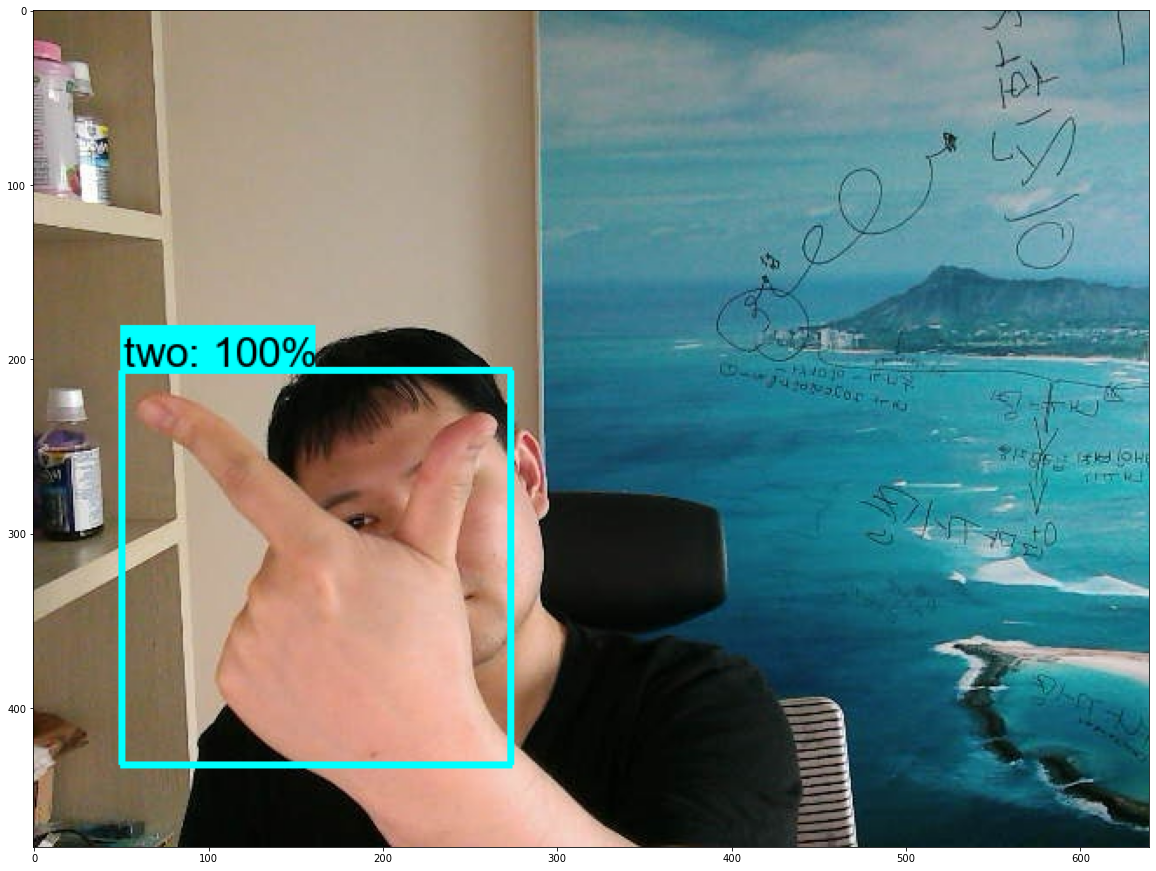

In [78]:
result_image = cv2.resize(img, (640,480))
plt.figure(figsize=(20,20))
plt.imshow(result_image)
plt.savefig('result_two_a.jpg')
plt.show()